In [1]:
import pandas as pd
import numpy as np
import re

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Cleanning des données

In [3]:
huiles_essentielles = pd.read_csv('huiles_essentielles.csv')
jolhairskin = pd.read_csv('jolhairskin.csv')
df_macerats = pd.read_csv('df_macerats.csv')
df_huile = pd.read_csv('df_huile.csv')
df_beurre = pd.read_csv('df_beurre.csv')
mademoisellebio = pd.read_csv('mademoisellebio.csv')
poudre_plante = pd.read_csv('poudre_plante.csv')
Yves_rocher = pd.read_csv('Yves_rocher.csv', encoding='latin-1', on_bad_lines='skip', sep=";")
colorfulblack = pd.read_csv('colorfulblack.csv')
mademoisellebio_1 = pd.read_csv('mademoisellebio_1.csv')
jolhairskin_1 = pd.read_csv('jolhairskin_1.csv')
df = pd.concat([huiles_essentielles, df_macerats, df_huile, df_beurre, colorfulblack], axis=0).reset_index(drop=True)
kalianature = pd.read_csv('kalianature.csv', encoding='latin-1', on_bad_lines='skip', sep=";")
typologie = pd.read_csv('typologie.csv', encoding='latin-1', on_bad_lines='skip', sep=";")
crenabe = pd.read_csv('crenabe.csv', encoding='latin-1', on_bad_lines='skip', sep=";")


In [4]:
df = df.drop('Unnamed: 0', 1)
df.head(2)

C:\Users\FALLSER\AppData\Local\Temp\ipykernel_5148\3819227712.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop('Unnamed: 0', 1)


,PRICE,description_produit,nom_produit,type_produit
0,"1,50 €",Revitalisant et lissan...,Aloe vera BIO ...,Macérât huileux ...
1,"4,95 €",Connu sous le nom huil...,Amla BIO ...,Macérât huileux ...


In [5]:
df.shape

(684, 4)

In [6]:
df.isna().sum()

PRICE                  25
description_produit     0
nom_produit             0
type_produit            0
dtype: int64

In [7]:
df = df.dropna().reset_index(drop=True)
df.shape

(659, 4)

In [8]:
df.description_produit[0]

"                        Revitalisant et lissant, ce macérât huileux est un ingrédient de choix pour redonner de l'élasticité à votre peau. L'épiderme est plus souple, et le teint plus lumineux.                    "

In [9]:
df.type_produit.unique().shape

(34,)

In [10]:
df.type_produit.unique()

array(['                        Macérât huileux                    ',
       '                        Extrait CO2                    ',
       '                        Huile végétale                    ',
       '                        Beurre végétal                    ',
       'ApHogee - Balancing Moisturizer (AprÃ¨s-shampoing Ã\xa0 rincer hydratant) - 237ml',
       'ApHogee - Balancing Moisturizer (AprÃ¨s-shampoing Ã\xa0 rincer hydratant) - 473ml',
       'ApHogee - Deep Moisture Shampoo (Shampoing hydratant)',
       'ApHogee - Keratin 2 Minute Reconstructor (Reconstructeur intensif) - 237ml',
       'ApHogee - Keratin 2 Minute Reconstructor (Reconstructeur intensif) - 473ml',
       'ApHogee - ProVitamin Leave-In Conditioner (Hydratation des longueurs)',
       'ApHogee - Shampoo for Damaged Hair (Shampoing protÃ©inÃ©)',
       'ApHogee - Two-Step Protein Treatment (Traitement protÃ©inÃ©) - 118ml',
       'ApHogee - Two-Step Protein Treatment (Traitement protÃ©inÃ©) - 473ml',
  

In [11]:
def process_type(type_prod):
    type_prod = type_prod.lower()
    return ("shampoing" if ('shamp' in type_prod)\
                else "protein treatment" if "protein treatment" in type_prod or "traitement prot" in type_prod\
                    else "reconstructeur intensif" if "reconstruc" in type_prod\
                      else "hydratant" if 'hydrat' in type_prod\
                        else "anti pelliculaire" if "pellicul" in type_prod\
                          else "activateur de boucles" if "activateur de boucles" in type_prod\
                            else "lisseur de bordures" if "lisseur de bordures" in type_prod\
                              else "gele coiffante" if "e coiffante" in type_prod\
                                else "leave-in conditioner" if "leave-in conditioner" in type_prod\
                                  else "differentes couleurs" if "rentes couleurs" in type_prod\
                                    else "curly hair" if "curly" in type_prod\
                                      else "pack wash day" if "pack wash day" in  type_prod\
                                        else type_prod).strip()

df.type_produit.apply(process_type).unique()

array(['macérât huileux', 'extrait co2', 'huile végétale',
       'beurre végétal', 'shampoing', 'reconstructeur intensif',
       'hydratant', 'protein treatment', 'activateur de boucles',
       'curly hair', 'gele coiffante', 'leave-in conditioner',
       'pack wash day', 'lisseur de bordures', 'differentes couleurs',
       'anti pelliculaire'], dtype=object)

In [ ]:
df["type_produit_traite"] = df.type_produit.apply(process_type)
df.to_csv('donnes_labaled_type_produit.csv')

In [9]:
descriptif=[['gra','adouciss','nourr','apai','brill','protect','fondant','onctueux','vitamin','forte porosité','ondulé'],
             ['brill','calmer','liss','stimul','fortifi','assouplir','apai','pouss','irrit','nourr','vitamin','huileux','pouss','faible porosité'],
             ['nourr','revitali','boucl','apai','couleur','surgraiss','assoupliss','brill','frisotti','prote','puissant','calmer','sec',
              'cuir','stimul','hydrat','gainant','antioxyd','sensibl','fortifi','liss','vitamin','fri','assainiss','pouss','cass',
              'alourdir','soyeux','fin','faible porosité','cheuveux epai','epai','cheveux moyennement epai'],
             ['nourr','hydrat','pellicul','menthol','renforc','sec','brill','humect','cassant','impuret','naturel','lavag','karit','chute','gra','irrit'],
             ['vitamin','traitement','profond','boost','traumat','soupless','sec','liss','reconstructeur','color'],
             ['spray','fortifi','glisser','boucl','nutrit','sec','irr','cheveux naturel','boucl','ondulé'],
             ['nourr', 'brill', 'boucl', 'hydrat', 'ricin', 'fri', 'cheveux naturel'],
             ['renforc','soin','cass','protein','puissanc','sec','cass','ondulé','boucl','cheveux epai','irrit','cheveux naturel'],
             ['activatr','hydrat','boucl','douceur','ondulé','boucl','fri','cheveux naturel'],
             ['antipelliculair','boucl','cass','irrit','doux','nourr','routin','apai','traitement','shampo','pellicul','sec','soin','soulag','naturel']]

#--------------------------------------------------------------------------------------------------

col=['beurre végétal',
     'macérât huileux',
     'huile végétale',
     'shampoing',
     'reconstructeur intensif',
     'hydratant',
     'activateur de boucles',
     'protein treatment',
     'curly hair',
     'anti pelliculaire']

#--------------------------------------------------------------------------------------------------


d = {"beurre végétal" : ['gras', 'adoucissant', 'nourrissants', 'apaisantes', 'brillance', 'protecteur',
                      'fondante', 'onctueux','vitamines', "forte porosité", "ondulés"],
"macérât huileux":['brillance','calmer','lisse','stimuler','fortifier','assouplir','apaisantes','pousse',
                      'irritations', 'nourrissantes', 'provitamine', 'huileux', 'pousse', "faible porosité"],
"huile végétale":['nourrit', 'revitalise', 'boucles', 'apaisante', 'couleur', 'surgraisser', 'assouplissant','brillance',
                      'frisottis','protectrices','puissants','calmer','secs','cuirs','stimuler','hydratante','gainante','antioxydants',
                      'sensibles','fortifier','lissant','vitamine','friction','assainissants','pousse','cassants','alourdir',
                      'soyeux',"fin", "faible porosité", "cheuveux epais", 'cheveux moyen', "epais", "cheveux moyennement epais"],
"shampoing" : ['nourrit', 'hydratant','pellicules', 'menthol','renforcer', 'secs','brillance',
                 'humectants','cassants','impuret','naturelle','lavage', 'karit','chute', "gras", "irrité"],

"reconstructeur intensif" : ['vitamines','traitement','profond','boost','traumatismes', 'souplesse', 'secs'
                               'lissages','reconstructeur','colorations'],

"hydratant" : ['spray','fortifier','glisser', 'boucl', 'nutrition',"sec","irrité", 'cheveux naturel', "bouclé",
                "ondulé"],

"activateur de boucles" : ['nourrit', 'brillantes', 'boucles','hydrate', 'ricin', 'fris', 'cheveux naturel'],

"protein treatment" : ['renforc', 'soin','cassure','protein','puissance',"sec","cassant","ondulés",
                         "bouclés","cheveux epais","irrité", "cheveux naturel"],

"curly hair":['activatrice', 'hydratante', 'boucles', 'douceur', "ondulés","bouclés","frisés","cheveux naturel"],
"anti pelliculaire" : ['antipelliculaire', 'bouclier','cassants', 'irritations', 'doux', 'nourrissantes',
                         'routine', 'apaise','traitement','shampoing','pellicules','secs', 'soin', 'soulager','naturels']
 }


In [10]:
#-------------------------------------------------------
def decoupe(texte):
    """
    utilise une expression regulière pour découper le texte (en paramètre) : 
    - le découpage se fait en fonction de ; ou , ou ' ou \n ou un (ou +) espaces
    - on conserve enfin les stems qui font 4 caractères ou plus
    la fonction retourne une liste de stems
    un stem peut être présent plusieurs fois dans la liste retournée
    """
    texte_decoupe = list(re.split('; |, |\' |\n |\s+',texte))
    texte_mini=[]
    for t in texte_decoupe:
        match = re.match('[a-z]{4,}',t)
        if match!=None:
            texte_mini.append(match.group(0))
    return texte_mini

#-------------------------------------------------------
def mots(descriptif):
    """
    retourne la liste de tous les mots de descriptif, de manière unique, dans une seule liste
    """
    liste_de_mots = []
    for desc in descriptif:
        for i in desc : 
            if not(i in liste_de_mots):
                liste_de_mots.append(i)
    return liste_de_mots

#-------------------------------------------------------
def tab(descriptif):
    """
    retourne la liste tableau avec les occurences pour chaque article (chaque rang) 
    des mots retenus (mots)
    une colonne par mot
    """
    tableau = []
    mots_elements = mots(descriptif)
    for desc in descriptif:
        ligne = []
        nombre_de_mots = len(desc)
        # if nombre_de_mots <=0 :
        #   continue
        # else :
        ligne = [desc.count(mot)/nombre_de_mots if nombre_de_mots != 0 else 0 for mot in mots_elements]
        tableau.append(ligne)
    return tableau

#-------------------------------------------------------
def cosij(ui,uj):
    """
    retourne le resultat du calcul de s_ij pour 2 valeurs ui(i) et uj(j)
    paramètres :
    les vecteurs ui et uj de modules mod(ui) et mod(uj)
    """
    s=0
    for i in range(len(ui)):
        if mod(ui) != 0 and mod(uj) != 0 :
            s += ui[i]*uj[i]/(mod(ui)*mod(uj))
        elif mod(ui) != 0 and mod(uj) == 0 :
            s += ui[i]*uj[i]/mod(ui)
        elif mod(ui) == 0 and mod(uj) != 0:
            s += ui[i]*uj[i]/mod(uj)
        else:
            s += 0
    return s

#-------------------------------------------------------
def mod(u):
    """
    calcule le module du vecteur mis en paramètre
    """
    s=0
    for i in range(len(u)):
        s += u[i]*u[i]
    s = s**0.5
    return s

#-------------------------------------------------------
def matrice_cos(A,B):
    """
    retourne la matrice de similitude entre 2 listes 
    de dimension 2 (liste de liste), A et B mises en paramètre
    """
    C = np.zeros(shape=(len(A),len(B)))
    for i in range(len(A)):
        for j in range(len(B)):
            C[i,j]=cosij(A[i],B[j])
    return C

#-------------------------------------------------------
def articles(tab):
    tab=tab.sort_values(ascending=False)
    articles = list(tab.index.values)
    recom = 'l\'article \033[1m {0:15} \033[0;0m est similaire à \033[1m{1:15}\033[0;0m voire peut être un peu à \033[1m{2:15}\033[0;0m'.format(articles[0],articles[1],articles[2])
    return recom

#-------------------------------------------------------
def recommandation(dataf):
    texte=[]
    col = list(dataf.keys()) 
    for c in col:
        tab_red=[]
        tab_red = dataf[c]
        texte.append(articles(tab_red))
    return texte

#-------------------------------------------------------
def tab_input_v2(desc):
    mots_elements = mots(descriptif)
    nombre_de_mots = len(desc)
    return [desc.count(mot)/nombre_de_mots if nombre_de_mots != 0 else 0 for mot in mots_elements]

#-------------------------------------------------------

In [70]:
df_ = pd.DataFrame(columns=list(d.keys()),index=[0])
for col in df_.columns:
    df_[col].loc[0] = d[col]

In [54]:
from nltk.stem import PorterStemmer

#df_['beurre végétal'].apply(lambda x : [PorterStemmer.stem(w) for w in x])
for col in df_.columns:
    l=[]
    print("######################\n", col, "\n#####################")
    for w in df_[col].loc[0]:
        l.append(PorterStemmer().stem(w))
        print(w, " : ",PorterStemmer().stem(w))
        #print(w)
    df_[col].loc[0] = l

######################
 beurre végétal 
#####################
gras  :  gra
adoucissant  :  adouciss
nourrissants  :  nourriss
apaisantes  :  apaisant
brillance  :  brillanc
protecteur  :  protecteur
fondante  :  fondant
onctueux  :  onctueux
vitamines  :  vitamin
forte porosité  :  forte porosité
ondulés  :  ondulé
######################
 macérât huileux 
#####################
brillance  :  brillanc
calmer  :  calmer
lisse  :  liss
stimuler  :  stimul
fortifier  :  fortifi
assouplir  :  assouplir
apaisantes  :  apaisant
pousse  :  pouss
irritations  :  irrit
nourrissantes  :  nourrissant
provitamine  :  provitamin
huileux  :  huileux
pousse  :  pouss
faible porosité  :  faible porosité
######################
 huile végétale 
#####################
nourrit  :  nourrit
revitalise  :  revitalis
boucles  :  boucl
apaisante  :  apaisant
couleur  :  couleur
surgraisser  :  surgraiss
assouplissant  :  assoupliss
brillance  :  brillanc
frisottis  :  frisotti
protectrices  :  protectric
puissant

In [ ]:
# on créé une liste contenant les articles : 
col = list(df_.keys())
#_=[col.remove(c) for c in ["gele coiffante","leave-in conditioner","pack wash day","lisseur de bordures","differentes couleurs"]]
# on créé une liste (descriptif) contenant, pour chaque article, une liste avec TOUS les mots retenus dans la description
descriptif = []
for cle in col:
    #desc = df_[cle][0]
    descriptif.append(df_[cle][0])

In [71]:
list(df_.keys())

['beurre végétal',
 'macérât huileux',
 'huile végétale',
 'shampoing',
 'reconstructeur intensif',
 'hydratant',
 'activateur de boucles',
 'protein treatment',
 'curly hair',
 'anti pelliculaire']

In [102]:
tableau = tab(descriptif)

In [103]:
len(tableau)

10

In [104]:
len(col)

10

In [105]:
df2 = pd.DataFrame(tableau,index=col,columns=mots(descriptif))
print(df2.shape)
df2.head()

(10, 77)


,gra,adouciss,nourr,apai,brill,protect,fondant,onctueux,vitamin,forte porosité,ondulé,calmer,liss,stimul,fortifi,assouplir,pouss,irrit,huileux,faible porosité,revitali,boucl,couleur,surgraiss,assoupliss,frisotti,prote,puissant,sec,cuir,hydrat,gainant,antioxyd,sensibl,fri,assainiss,cass,alourdir,soyeux,fin,cheuveux epai,epai,cheveux moyennement epai,pellicul,menthol,renforc,humect,cassant,impuret,naturel,lavag,karit,chute,traitement,profond,boost,traumat,soupless,reconstructeur,color,spray,glisser,nutrit,irr,cheveux naturel,ricin,soin,protein,puissanc,cheveux epai,activatr,douceur,antipelliculair,doux,routin,shampo,soulag
beurre végétal,0.090909,0.090909,0.090909,0.090909,0.090909,0.090909,0.090909,0.090909,0.090909,0.090909,0.090909,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
macérât huileux,0.000000,0.000000,0.071429,0.071429,0.071429,0.000000,0.000000,0.000000,0.071429,0.000000,0.000000,0.071429,0.071429,0.071429,0.071429,0.071429,0.142857,0.071429,0.071429,0.071429,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
huile végétale,0.000000,0.000000,0.030303,0.030303,0.030303,0.000000,0.000000,0.000000,0.030303,0.000000,0.000000,0.030303,0.030303,0.030303,0.030303,0.000000,0.030303,0.000000,0.000000,0.030303,0.030303,0.030303,0.030303,0.030303,0.030303,0.030303,0.030303,0.030303,0.030303,0.030303,0.030303,0.030303,0.030303,0.030303,0.030303,0.030303,0.030303,0.030303,0.030303,0.030303,0.030303,0.030303,0.030303,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
shampoing,0.062500,0.000000,0.062500,0.000000,0.062500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.062500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.062500,0.000000,0.062500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0625,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
reconstructeur intensif,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df2.to_csv("df2_v3.csv")

In [107]:
mat=matrice_cos(tableau,tableau)
mat

array([[1.        , 0.30151134, 0.20994555, 0.22613351, 0.09534626,
        0.08703883, 0.22792115, 0.0805823 , 0.09534626, 0.15569979],
       [0.30151134, 1.        , 0.47871355, 0.1875    , 0.15811388,
        0.07216878, 0.18898224, 0.06681531, 0.        , 0.19364917],
       [0.20994555, 0.47871355, 1.        , 0.17407766, 0.16514456,
        0.20100756, 0.32897585, 0.18609684, 0.22019275, 0.22473329],
       [0.22613351, 0.1875    , 0.17407766, 1.        , 0.07905694,
        0.07216878, 0.28347335, 0.20044593, 0.07905694, 0.32274861],
       [0.09534626, 0.15811388, 0.16514456, 0.07905694, 1.        ,
        0.09128709, 0.        , 0.08451543, 0.        , 0.16329932],
       [0.08703883, 0.07216878, 0.20100756, 0.07216878, 0.09128709,
        1.        , 0.32732684, 0.38575837, 0.54772256, 0.2236068 ],
       [0.22792115, 0.18898224, 0.32897585, 0.28347335, 0.        ,
        0.32732684, 1.        , 0.20203051, 0.5976143 , 0.19518001],
       [0.0805823 , 0.06681531, 0.1860968

In [108]:
# visualisation du tableau grace à son DataFrame
df3=pd.DataFrame(mat,index=col,columns=col)
df3.head()

,beurre végétal,macérât huileux,huile végétale,shampoing,reconstructeur intensif,hydratant,activateur de boucles,protein treatment,curly hair,anti pelliculaire
beurre végétal,1.000000,0.301511,0.209946,0.226134,0.095346,0.087039,0.227921,0.080582,0.095346,0.155700
macérât huileux,0.301511,1.000000,0.478714,0.187500,0.158114,0.072169,0.188982,0.066815,0.000000,0.193649
huile végétale,0.209946,0.478714,1.000000,0.174078,0.165145,0.201008,0.328976,0.186097,0.220193,0.224733
shampoing,0.226134,0.187500,0.174078,1.000000,0.079057,0.072169,0.283473,0.200446,0.079057,0.322749
reconstructeur intensif,0.095346,0.158114,0.165145,0.079057,1.000000,0.091287,0.000000,0.084515,0.000000,0.163299


In [109]:
df3.to_csv('df3_mat_version_type_prod_v3.csv')

<AxesSubplot:>

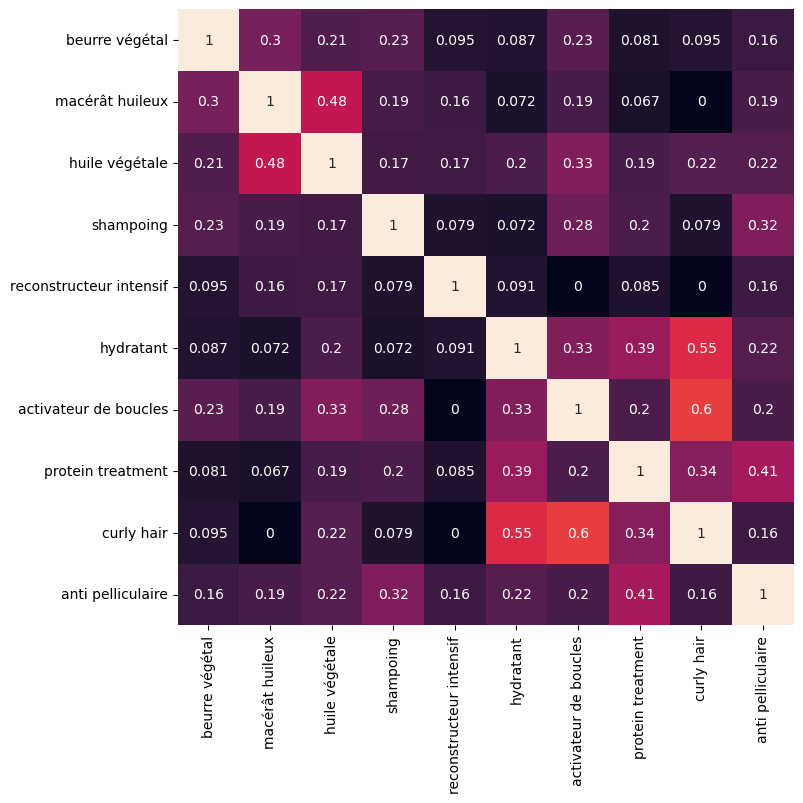

In [110]:
# visualisation à l'aide d'un outil en couleur
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))
col = list(df3.keys())
sns.heatmap(mat, square=True, annot=True, cbar=False
            , xticklabels=list(col)
            , yticklabels=list(col))

In [111]:
texte = recommandation(df3)
for t in texte:
    print(t)

l'article  beurre végétal   est similaire à macérât huileux voire peut être un peu à activateur de boucles
l'article  macérât huileux  est similaire à huile végétale  voire peut être un peu à beurre végétal 
l'article  huile végétale   est similaire à macérât huileux voire peut être un peu à activateur de boucles
l'article  shampoing        est similaire à anti pelliculaire voire peut être un peu à activateur de boucles
l'article  reconstructeur intensif  est similaire à huile végétale  voire peut être un peu à anti pelliculaire
l'article  hydratant        est similaire à curly hair      voire peut être un peu à protein treatment
l'article  activateur de boucles  est similaire à curly hair      voire peut être un peu à huile végétale 
l'article  protein treatment  est similaire à anti pelliculaire voire peut être un peu à hydratant      
l'article  curly hair       est similaire à activateur de boucles voire peut être un peu à hydratant      
l'article  anti pelliculaire  est similaire

In [112]:
cosij(tableau[0],tab_input_v2(['nourr', 'brill', 'boucl','hydrate', 'ricin', 'fri', 'cheveux naturel']))

0.24618298195866548

In [116]:
len(tab_prod.loc[9].values[1:])

77

In [13]:
tab_prod = pd.read_csv("df2_v3.csv")

In [115]:
tab_prod

,Unnamed: 0,gra,adouciss,nourr,apai,brill,protect,fondant,onctueux,vitamin,forte porosité,ondulé,calmer,liss,stimul,fortifi,assouplir,pouss,irrit,huileux,faible porosité,revitali,boucl,couleur,surgraiss,assoupliss,frisotti,prote,puissant,sec,cuir,hydrat,gainant,antioxyd,sensibl,fri,assainiss,cass,alourdir,soyeux,fin,cheuveux epai,epai,cheveux moyennement epai,pellicul,menthol,renforc,humect,cassant,impuret,naturel,lavag,karit,chute,traitement,profond,boost,traumat,soupless,reconstructeur,color,spray,glisser,nutrit,irr,cheveux naturel,ricin,soin,protein,puissanc,cheveux epai,activatr,douceur,antipelliculair,doux,routin,shampo,soulag
0,beurre végétal,0.090909,0.090909,0.090909,0.090909,0.090909,0.090909,0.090909,0.090909,0.090909,0.090909,0.090909,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.0000,0.0000,0.0000,0.000000,0.0000,0.0000,0.0000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000
1,macérât huileux,0.000000,0.000000,0.071429,0.071429,0.071429,0.000000,0.000000,0.000000,0.071429,0.000000,0.000000,0.071429,0.071429,0.071429,0.071429,0.071429,0.142857,0.071429,0.071429,0.071429,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.0000,0.0000,0.0000,0.000000,0.0000,0.0000,0.0000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000
2,huile végétale,0.000000,0.000000,0.030303,0.030303,0.030303,0.000000,0.000000,0.000000,0.030303,0.000000,0.000000,0.030303,0.030303,0.030303,0.030303,0.000000,0.030303,0.000000,0.000000,0.030303,0.030303,0.030303,0.030303,0.030303,0.030303,0.030303,0.030303,0.030303,0.030303,0.030303,0.030303,0.030303,0.030303,0.030303,0.030303,0.030303,0.030303,0.030303,0.030303,0.030303,0.030303,0.030303,0.030303,0.000000,0.0000,0.000000,0.0000,0.0000,0.0000,0.000000,0.0000,0.0000,0.0000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000
3,shampoing,0.062500,0.000000,0.062500,0.000000,0.062500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.062500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.062500,0.000000,0.062500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.062500,0.0625,0.062500,0.0625,0.0625,0.0625,0.062500,0.0625,0.0625,0.0625,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000
4,reconstructeur intensif,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.0000,0.0000,0.0000,0.000000,0.0000,0.0000,0.0000,0.100000,0.1,0.1,0.1,0.1,0.1,0.1,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000
5,hydratant,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000,0.000000,0.100000,0.000000

In [14]:
len(tab_input_v2(['nourr', 'brill', 'boucl','hydrate', 'ricin', 'fri', 'cheveux naturel']))

77

In [89]:
list(tab_prod['Unnamed: 0'].values)

['beurre végétal',
 'macérât huileux',
 'huile végétale',
 'shampoing',
 'reconstructeur intensif',
 'hydratant',
 'activateur de boucles',
 'protein treatment',
 'curly hair',
 'anti pelliculaire']

In [92]:
tab_prod

,Unnamed: 0,gra,adouciss,nourr,apai,brill,protecteur,fondant,onctueux,vitamin,forte porosité,ondulé,calmer,liss,stimul,fortifi,assouplir,pouss,irrit,huileux,faible porosité,revitali,boucl,couleur,surgraiss,assoupliss,frisotti,protectr,puissant,sec,cuir,hydrat,gainant,antioxyd,sensibl,lissant,fri,assainiss,cassant,alourdir,soyeux,fin,cheuveux epai,cheveux moyen,epai,cheveux moyennement epai,pellicul,menthol,renforc,humect,impuret,naturel,lavag,karit,chute,irrité,traitement,profond,boost,traumat,soupless,secslissag,reconstructeur,color,spray,glisser,nutrit,cheveux naturel,ricin,soin,cassur,protein,puissanc,cheveux epai,activatr,douceur,antipelliculair,doux,routin,shampo,soulag
0,beurre végétal,0.090909,0.090909,0.090909,0.090909,0.090909,0.090909,0.090909,0.090909,0.090909,0.090909,0.090909,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.0000,0.0000,0.000000,0.0000,0.0000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000
1,macérât huileux,0.000000,0.000000,0.071429,0.071429,0.071429,0.000000,0.000000,0.000000,0.071429,0.000000,0.000000,0.071429,0.071429,0.071429,0.071429,0.071429,0.142857,0.071429,0.071429,0.071429,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.0000,0.0000,0.000000,0.0000,0.0000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000
2,huile végétale,0.000000,0.000000,0.029412,0.029412,0.029412,0.000000,0.000000,0.000000,0.029412,0.000000,0.000000,0.029412,0.000000,0.029412,0.029412,0.000000,0.029412,0.000000,0.000000,0.029412,0.029412,0.029412,0.029412,0.029412,0.029412,0.029412,0.029412,0.029412,0.029412,0.029412,0.029412,0.029412,0.029412,0.029412,0.029412,0.029412,0.029412,0.029412,0.029412,0.029412,0.029412,0.029412,0.029412,0.029412,0.029412,0.000000,0.0000,0.000000,0.0000,0.0000,0.000000,0.0000,0.0000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000
3,shampoing,0.062500,0.000000,0.062500,0.000000,0.062500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.062500,0.000000,0.062500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.062500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.062500,0.0625,0.062500,0.0625,0.0625,0.062500,0.0625,0.0625,0.0625,0.062500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000
4,reconstructeur intensif,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.111111,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.0000,0.0000,0.000000,0.0000,0.0000,0.0000,0.00

In [15]:
cosij(tab_prod.loc[0].values[1:],tab_input_v2(['nourr', 'brill', 'boucl','hydrate', 'ricin', 'fri', 'cheveux naturel']))

0.24618298195866542

In [16]:
d={}
for i in tab_prod.index:
    d[tab_prod["Unnamed: 0"].loc[i]] = cosij(tab_prod.loc[i].values[1:],tab_input_v2(['nourr', 'brill', 'boucl','hydrate', 'ricin', 'fri', 'cheveux naturel']))
d

{'beurre végétal': 0.24618298195866542,
 'macérât huileux': 0.20412414523193156,
 'huile végétale': 0.2842676218074805,
 'shampoing': 0.2041241452319315,
 'reconstructeur intensif': 0.0,
 'hydratant': 0.35355339059327373,
 'activateur de boucles': 0.9258200997725516,
 'protein treatment': 0.2182178902359924,
 'curly hair': 0.5163977794943223,
 'anti pelliculaire': 0.21081851067789198}

In [17]:
sorted(d.items(), key=lambda t: t[1], reverse=True)

[('activateur de boucles', 0.9258200997725516),
 ('curly hair', 0.5163977794943223),
 ('hydratant', 0.35355339059327373),
 ('huile végétale', 0.2842676218074805),
 ('beurre végétal', 0.24618298195866542),
 ('protein treatment', 0.2182178902359924),
 ('anti pelliculaire', 0.21081851067789198),
 ('macérât huileux', 0.20412414523193156),
 ('shampoing', 0.2041241452319315),
 ('reconstructeur intensif', 0.0)]

In [27]:
d_sorted = sorted(d.items(), key=lambda t: t[1], reverse=True)
ch=''
i=0
for typ in d_sorted:
    ch+=typ[0]+', '
    i+=1
    if i == 2:break
ch[:-2]

'activateur de boucles, curly hair'

In [28]:
df_data = pd.read_csv('donnes_labaled_type_produit.csv')

In [29]:
df_data.head(2)

,Unnamed: 0,PRICE,description_produit,nom_produit,type_produit,type_produit_traite
0,0,"1,50 €",Revitalisant et lissan...,Aloe vera BIO ...,Macérât huileux ...,macérât huileux
1,1,"4,95 €",Connu sous le nom huil...,Amla BIO ...,Macérât huileux ...,macérât huileux


In [33]:
df_data.type_produit_traite.unique()

array(['macérât huileux', 'extrait co2', 'huile végétale',
       'beurre végétal', 'shampoing', 'reconstructeur intensif',
       'hydratant', 'protein treatment', 'activateur de boucles',
       'curly hair', 'gele coiffante', 'leave-in conditioner',
       'pack wash day', 'lisseur de bordures', 'differentes couleurs',
       'anti pelliculaire'], dtype=object)

In [40]:
prods = ch[:-2].split(',')
prods = [typ.strip() for typ in prods]
df_data[df_data.type_produit_traite == prods[0]].shape[0] + df_data[df_data.type_produit_traite == prods[1]].shape[0]

57